In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import librosa

In [2]:
# Mendefinisikan path folder suara tinggi dan suara rendah
path_suara_tinggi = "Suara Tinggi"
path_suara_rendah = "Suara rendah"

In [3]:
# Fungsi untuk mengekstraksi fitur MFCC dari suara
def extract_mfcc(file_path):
    audio, sample_rate = librosa.load(file_path)
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=20)  # Mengambil 20 koefisien MFCC
    return mfcc_features.T

In [4]:
# Membaca file suara tinggi
suara_tinggi = []
labels_tinggi = []
for filename in os.listdir(path_suara_tinggi):
    if filename.endswith(".wav"):
        mfcc = extract_mfcc(os.path.join(path_suara_tinggi, filename))
        suara_tinggi.extend(mfcc)
        labels_tinggi.extend(["tinggi"] * len(mfcc))

# Membaca file suara rendah
suara_rendah = []
labels_rendah = []
for filename in os.listdir(path_suara_rendah):
    if filename.endswith(".wav"):
        mfcc = extract_mfcc(os.path.join(path_suara_rendah, filename))
        suara_rendah.extend(mfcc)
        labels_rendah.extend(["rendah"] * len(mfcc))

In [7]:
# Menggabungkan data suara tinggi dan suara rendah
X = np.array(suara_tinggi + suara_rendah)
y = np.array(labels_tinggi + labels_rendah)

# Membagi data menjadi subset latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Membuat objek model SVM
# Membuat objek model SVM dengan perubahan parameter
model = SVC()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

SVC()

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


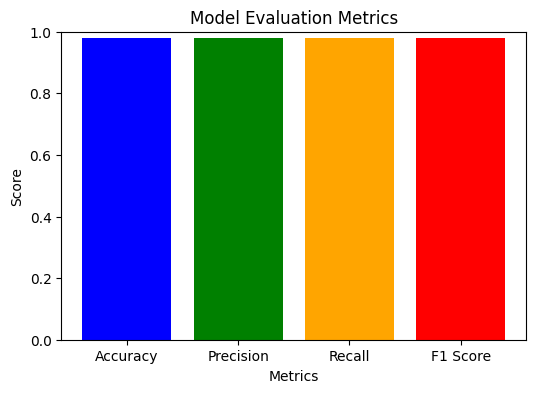

In [8]:
import matplotlib.pyplot as plt

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik akurasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan metrik akurasi
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

# Menampilkan visualisasi akurasi
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()